In [10]:
#import libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [16]:
#Get the stock quote
df = web.DataReader('GOOG', data_source='yahoo', start='2012-01-02', end = '2021-12-17')
#show data
df

TypeError: string indices must be integers

In [31]:
#get the numbers of rows and columns in the data set
print(df.shape)

(2760, 6)


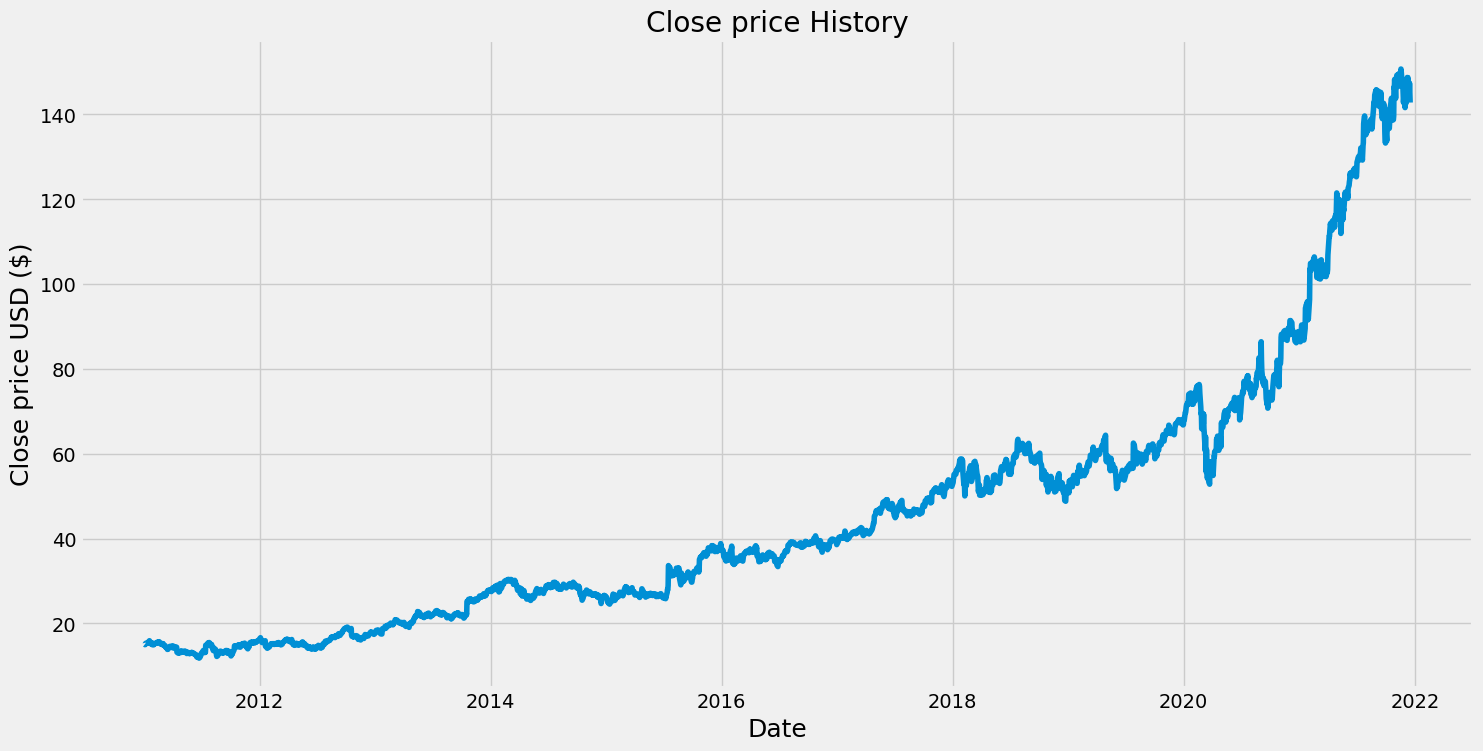

In [58]:
#visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close price USD ($)', fontsize = 18)
plt.show()

In [33]:
#create a new dataframe with only the 'Close column
data = df.filter(['Close'])

#Convert the dataframe to a numpy array
dataset = data.values

#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)
print(training_data_len)

2208


In [34]:
#Scale the data
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)
print(scaled_data)

[[0.02321884]
 [0.02281891]
 [0.02406532]
 ...
 [0.97594709]
 [0.95773011]
 [0.94307366]]


In [35]:
#Create the training dataset
#Create the scaled training dataset
train_data = scaled_data[0:training_data_len, :]

#split the data into x_train and y_train data sets
x_train = []
y_train = []
for i in range (60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i, 0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()

[array([0.02321884, 0.02281891, 0.02406532, 0.02485977, 0.02538702,
       0.02498711, 0.02530992, 0.02546414, 0.02543186, 0.0267751 ,
       0.02954587, 0.02813268, 0.02723958, 0.02456028, 0.02442578,
       0.02600934, 0.02539779, 0.0254498 , 0.02261626, 0.02250328,
       0.02441861, 0.02459077, 0.024259  , 0.02440784, 0.02500145,
       0.02573494, 0.02539779, 0.02538702, 0.02683249, 0.02748707,
       0.02676972, 0.02678227, 0.02696878, 0.02783319, 0.02426976,
       0.02446882, 0.02402048, 0.02423927, 0.02484184, 0.02257502,
       0.0225804 , 0.02415318, 0.0225499 , 0.02094304, 0.02105961,
       0.02096277, 0.01890577, 0.01826195, 0.0170568 , 0.01697968,
       0.01474513, 0.01550912, 0.01545532, 0.01822428, 0.01837134,
       0.01923934, 0.0200876 , 0.01880534, 0.01801984, 0.01916222])]
[0.019181950304596032]

[array([0.02321884, 0.02281891, 0.02406532, 0.02485977, 0.02538702,
       0.02498711, 0.02530992, 0.02546414, 0.02543186, 0.0267751 ,
       0.02954587, 0.02813268, 0.0

In [36]:
#convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [37]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print(x_train.shape)

(2148, 60, 1)


In [38]:
#build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [39]:
#compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [59]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2148/2148 [==============================] - 40s 18ms/step - loss: 1.1862e-04


In [41]:
#Create the testing data set
#Create a new array containing scaled valus from index 1543 to 2003
test_data = scaled_data[training_data_len - 60:, :]

#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [42]:
#convert the data to a numpy array
x_test = np.array(x_test)

In [43]:
#reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [44]:
#get the models prdicted price values
predictions = model.predict(x_test)
predictions= scaler.inverse_transform(predictions)

18/18 [==============================] - 2s 27ms/step


In [45]:
#get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
print(rmse)

1.2315819712652676


C:\Users\princ\AppData\Local\Temp\ipykernel_8428\2569432951.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


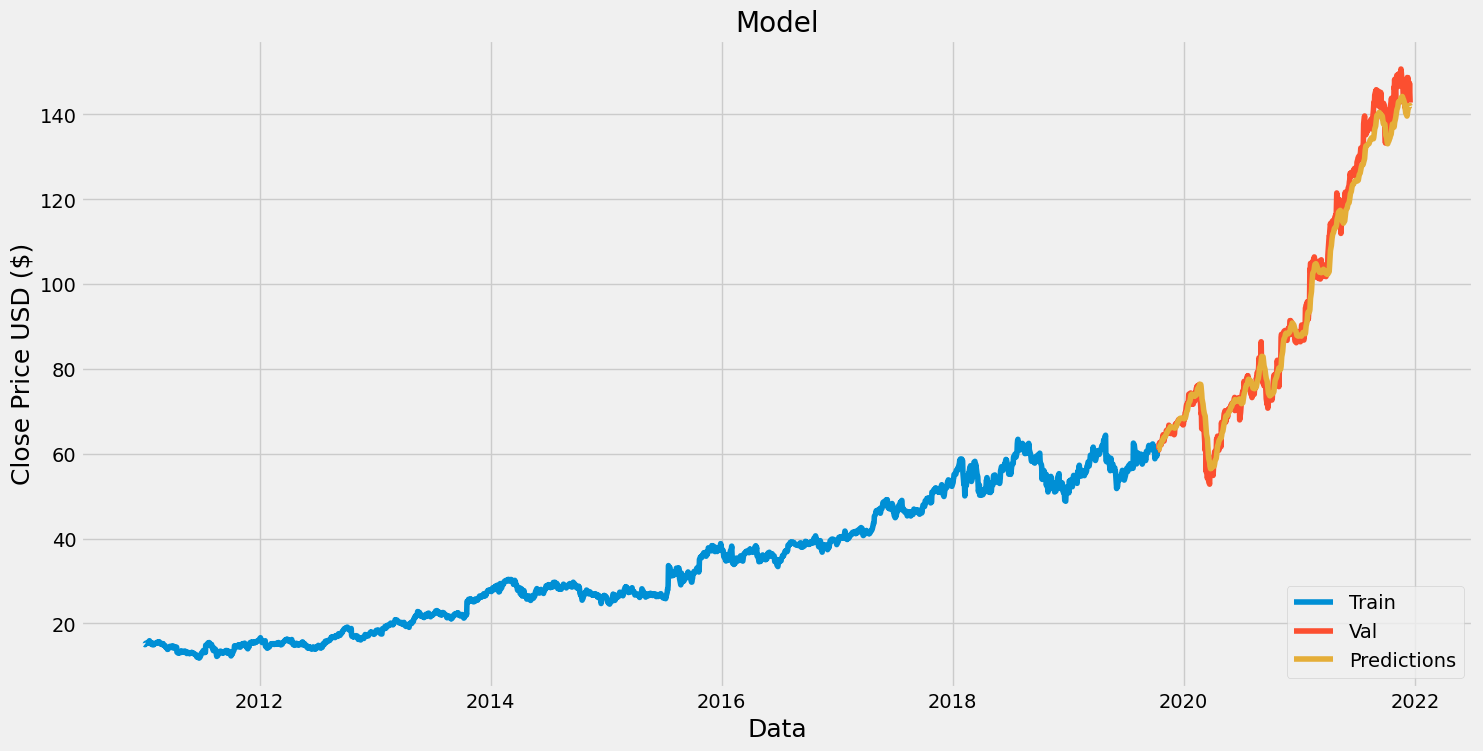

In [46]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Data', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show()

In [47]:
#show the valid and predicted prices
print(valid)

                 Close  Predictions
Date                               
2019-10-11   60.772499    60.959789
2019-10-14   60.856998    61.022987
2019-10-15   62.150501    61.125225
2019-10-16   62.181999    61.371895
2019-10-17   62.653500    61.666908
...                ...          ...
2021-12-13  146.704498   141.756027
2021-12-14  144.970505   142.075455
2021-12-15  147.368500   142.055084
2021-12-16  144.838501   142.132675
2021-12-17  142.802994   141.966095

[552 rows x 2 columns]


In [54]:
#get the quote
google_quote = web.DataReader('GOOG', data_source = 'yahoo', start = '2002-01-01', end = '2022-11-01')
#create a new dataframe
new_df = google_quote.filter(['Close'])
#get the last 60 days closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 qnd 1
last_60_days_scaled = scaler.transform(last_60_days)
#create the empty list
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 0s 49ms/step
[[96.925156]]


In [56]:
google_quote2 = web.DataReader('GOOG', data_source = 'yahoo', start = '2022-11-02', end = '2022-11-02')
print(google_quote2['Close'])

Date
2022-11-01    90.50
2022-11-02    87.07
Name: Close, dtype: float64
